In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/My Drive/webmd.csv')

In [4]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [4]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


By looking at the head of the data we see that there are 12 features. 'Sides' can serve as our target variable. But it need some further processing as useful as a target variable.

In [5]:
#check the shape of the given dataset
df.shape

(362806, 12)

In [6]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [7]:
df.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Here have null values in Reviews column only.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [9]:
df.describe(include='all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,362806,362806,362806,362806,362806.000000,362806.000000,362806.000000,362769,362806.000000,362806,362806,362806.000000
unique,12,1806,4524,7093,NaN,NaN,NaN,250167,NaN,3,1651,NaN
top,45-54,Other,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,,NaN
freq,80043,49765,404,4648,NaN,NaN,NaN,41824,NaN,238226,17460,NaN
mean,NaN,NaN,NaN,NaN,36879.370774,4.019829,3.532061,NaN,3.135408,NaN,NaN,6.744916
std,NaN,NaN,NaN,NaN,52624.412971,1.317711,1.455961,NaN,1.611106,NaN,NaN,9.324240
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,3.000000,3.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,9548.000000,5.000000,4.000000,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,63522.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


# Insight

1.Most used drug is cymbalta, It will be intresting to see for what condition it is used.

2.People of age between 45 to 54 used more drugs.

3.Females are used more drugs.

4.Most single day review came on 10/29/2007.

In [10]:
df.apply(lambda x: len(x.unique()))

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250168
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [11]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

Here are 238226 females and 98043 males. But 26537 people have not been identified as belonging to any gender.

In [12]:
df['Sex'].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'

Female    65.662%
Male      27.024%
           7.314%
Name: Sex, dtype: object

In [13]:
df['Sex'].replace(' ',np.nan, inplace = True)

In [14]:
df.dropna(subset=['Sex'],inplace=True)

In [15]:
df['Sex'].value_counts()

Female    238226
Male       98043
Name: Sex, dtype: int64

In [16]:
#display all catagorical columns
df_catagorical=df.select_dtypes(include=['category'])


In [17]:
df.select_dtypes(include=['object']).columns.tolist()

['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [18]:
df['Drug'].value_counts()

cymbalta                                           4451
lisinopril                                         4022
lisinopril solution                                4022
lexapro                                            3912
hydrocodone-acetaminophen                          3661
                                                   ... 
stay awake tablet                                     1
huperzine serrate a (bulk) 1 % powder                 1
stearic acid powder                                   1
nitrofurantoin macrocrystal (bulk) 100 % powder       1
isoflurane liquid                                     1
Name: Drug, Length: 6846, dtype: int64

Most occuring drug is cymbalta

In [19]:
df['Effectiveness'].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
6         2
Name: Effectiveness, dtype: int64

In [20]:
#Checking effectiveness Distribution
eff_=df['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().\
rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
eff_['percent'] = 100 * (eff_['counts']/df.shape[0])
print(eff_)

   Effectiveness  counts    percent
0              5  120887  35.949493
1              4   76460  22.737749
2              3   56114  16.687236
3              1   54330  16.156708
4              2   28476   8.468220
5              6       2   0.000595


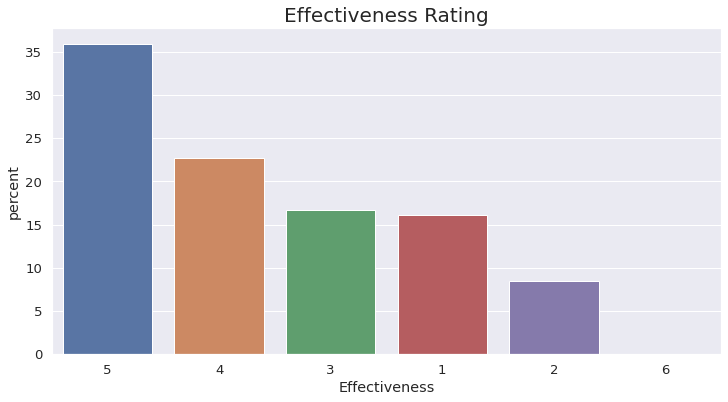

In [21]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
#let's plot and check
sns.barplot(x =eff_['Effectiveness'], y =eff_['percent'],order =eff_['Effectiveness'])
plt.title('Effectiveness Rating',fontsize=20)
plt.show()

•	More than 35% of reviews says that the drugs has effectiveness of 5 out of 10.There are effectiveness less than five and the reviews on this is in between 5% - 25%. 

•	Those whose says the effectiveness is higher than 5 is very less and it is countable.


# DATA VISUALISATION AND EXPLORATORY DATA ANALYSIS

In [24]:
#check number of unique values in drug and condition
print(df['Drug'].nunique())
print(df['Condition'].nunique())

6846
1754


We can see that there are 7093 drugs and only 1806 conditions. So there are conditions which has multiple drugs.

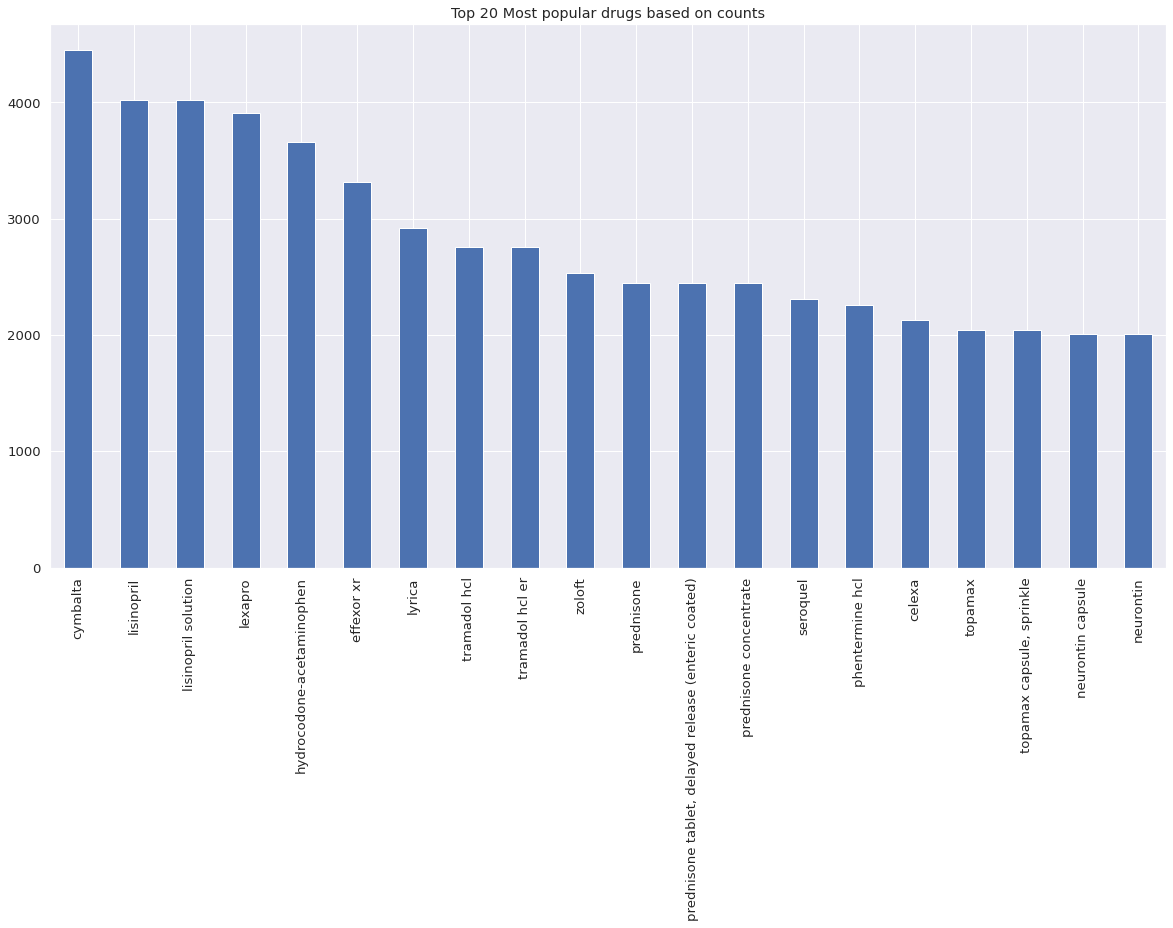

In [25]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(20,10))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

# Insight
•	The most commonly used drug is Cymbalta.

•	The top four drugs has count of reviews around 4000 and above.

•	If we look at the top 20, around 2000 people has given reviews on each drug

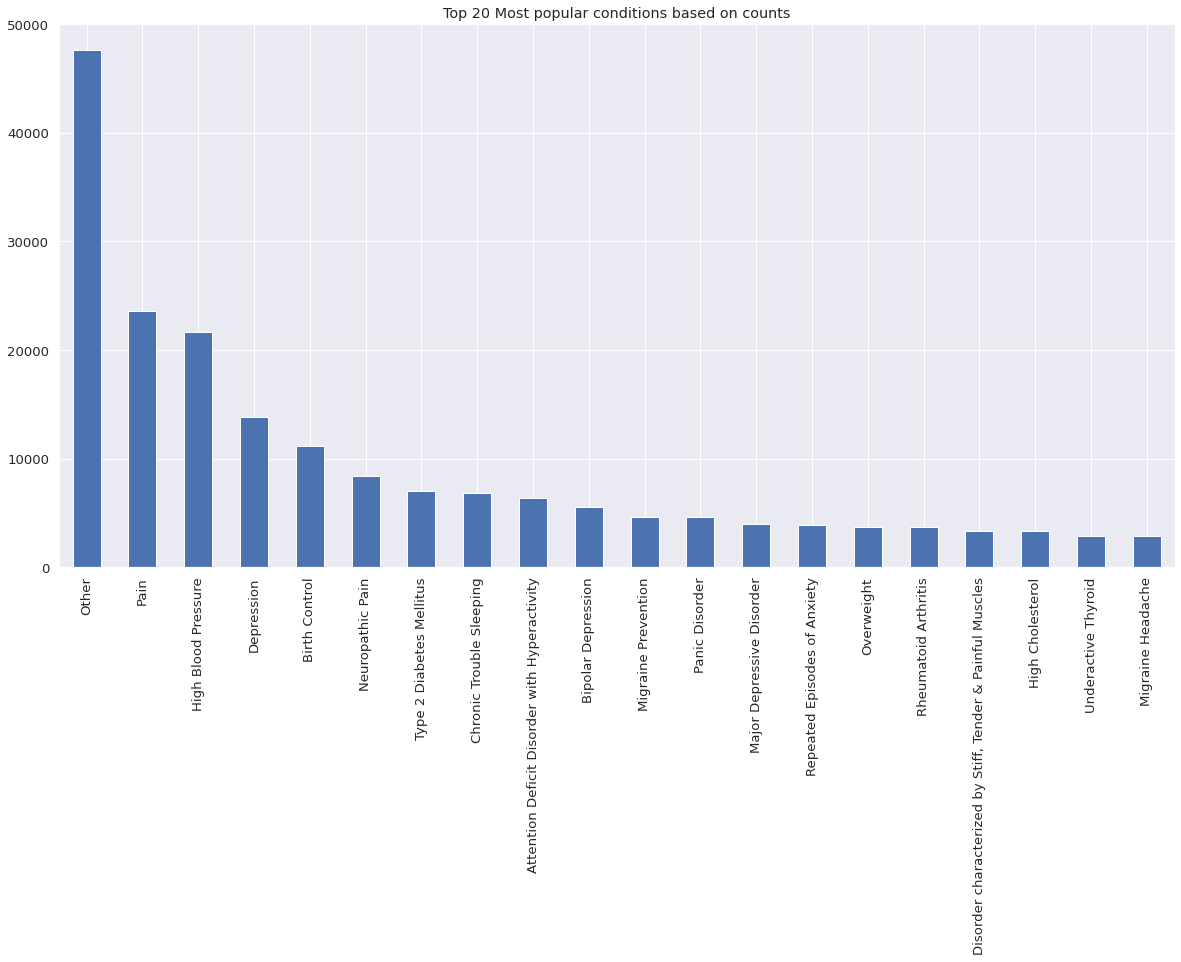

In [25]:
#plot a bargraph to check top 20 conditions
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

# Insight

•	From the graph, it is clear that there are many conditions, which is not specifically represented in the reviews.

•	We can see that around 5000 reviews has specified the condition as ‘other’ in their reviews.

•	Rather than ‘other’, we can see that ‘pain’ and ‘high blood pressure’ leads to the high usage of medicine


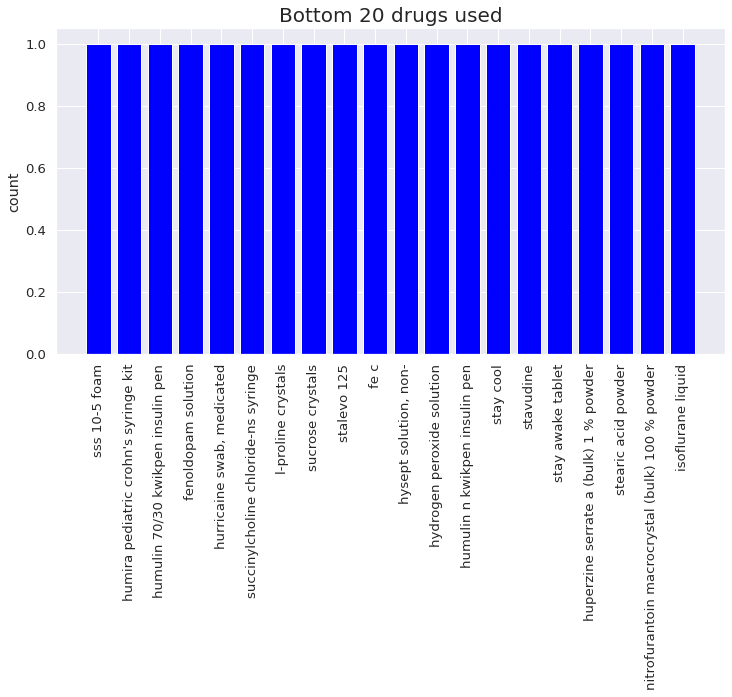

In [26]:
#plot a bargraph to check bottom 20 drugs used
plt.figure(figsize=(12,6))
drug_bottom=df['Drug'].value_counts(ascending = False).tail(20)

plt.bar(drug_bottom.index,drug_bottom.values,color='blue')
plt.title('Bottom 20 drugs used',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

Insight

•	From the above graph, we can see less used drugs and the count is one. i.e., we have only one review on these drugs. These might be the drugs used of rare conditions or are new in market.

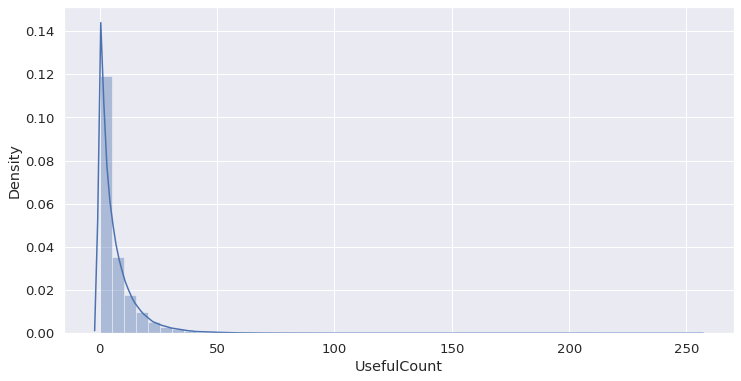

In [27]:
#plot a distribution plot of useful Count
sns.distplot(df['UsefulCount'])
plt.show()

# Insight

1.usefulCount is positively-skewed.

2.Most of the usefulCounts are distributed between 0 and 50.

3.There are extreme outliers present in our usefulCounts.

In [28]:
#Check number of Drugs per condition
df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4324
Osteoporosis                                   228
Birth Control                                  201
High Blood Pressure                            199
Pain                                           198
Acne                                           185
Painful Periods                                156
Rheumatoid Arthritis                           144
Cough                                          131
Cold Symptoms                                  120
Inflammation of the Nose due to an Allergy     117
Type 2 Diabetes Mellitus                       113
Abnormally Long or Heavy Periods               110
Stuffy Nose                                    105
Incomplete or Infrequent Bowel Movements       105
Disease of Ovaries with Cysts                  102
Allergic Conjunctivitis                         95
Migraine Headache                               94
"Change of Life" Signs                          91
Atopic Dermatitis    

In [29]:
len(df['Sides'].unique().tolist())

1620

In [30]:
df['Sides'].value_counts()

                                                                                                                                                                                                                                                                                                         16192
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                                                                                                                            14400
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                                                                                         11123
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to t

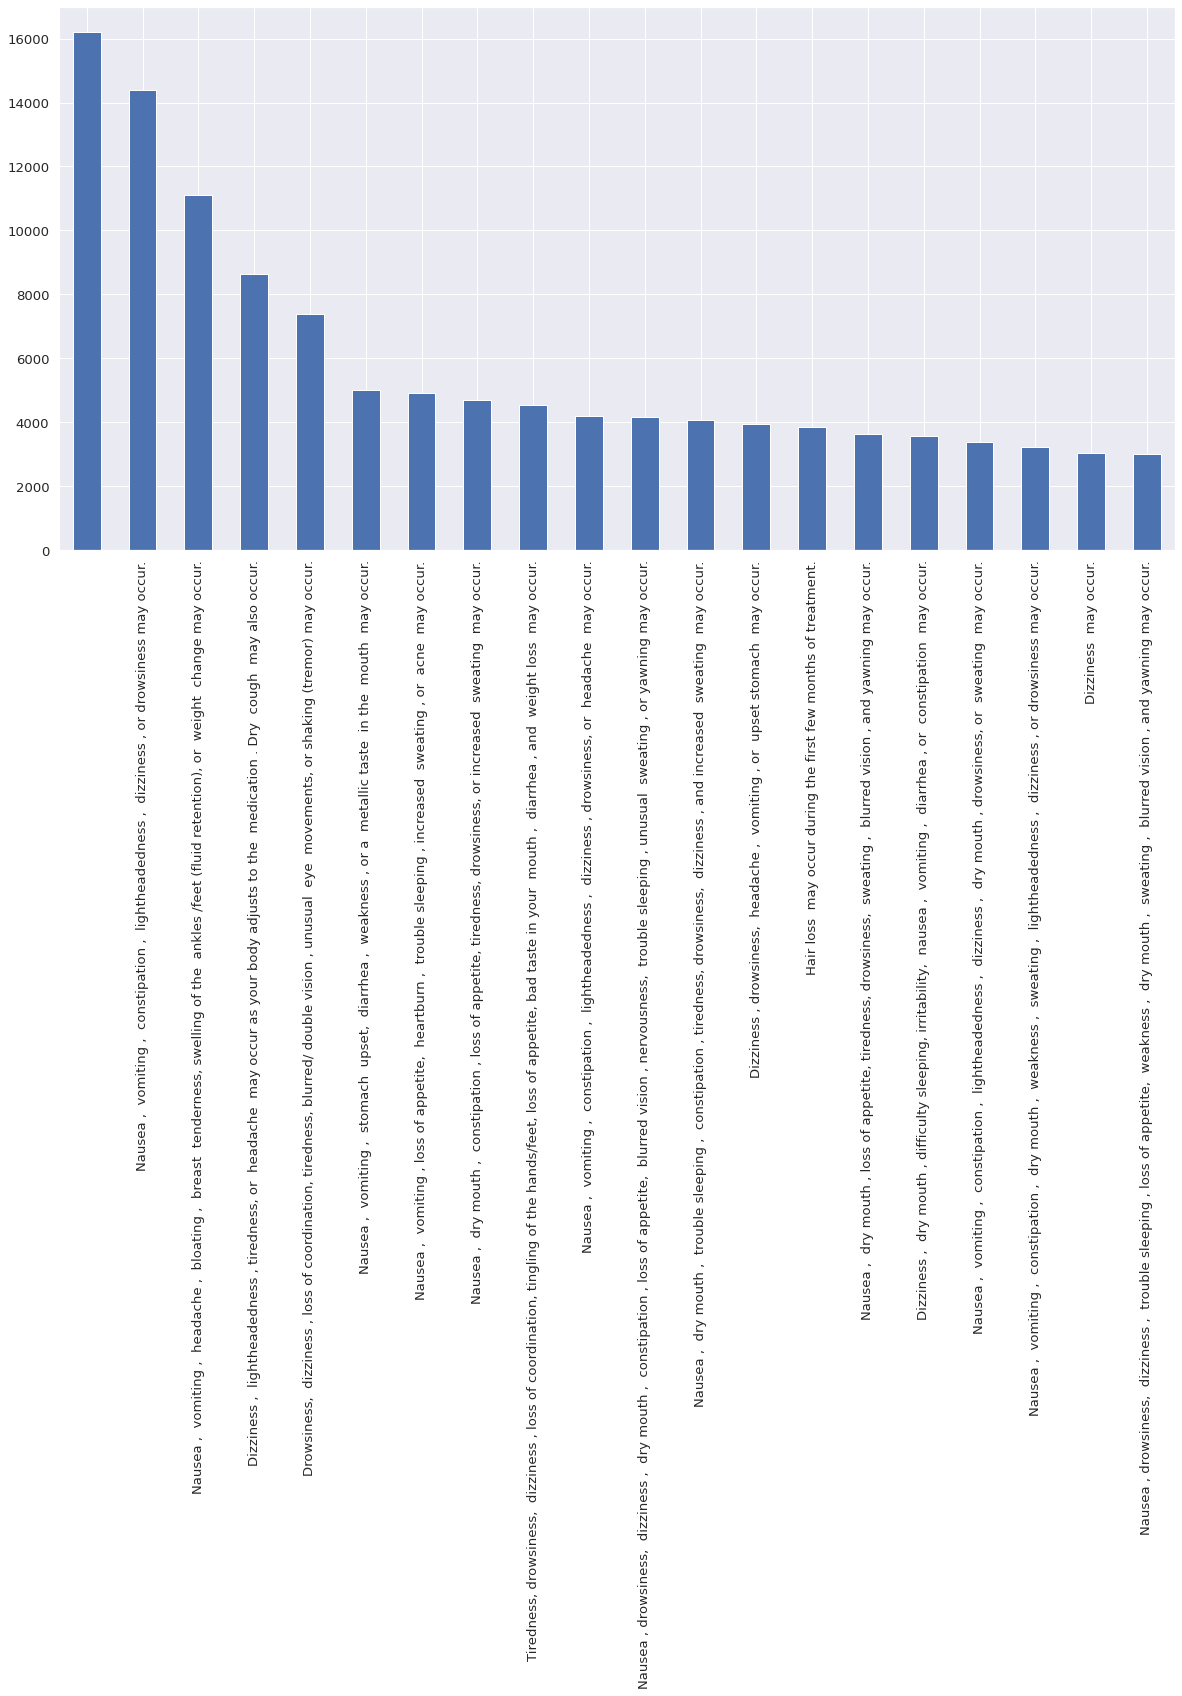

In [31]:
df['Sides'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))

In [32]:
df['Satisfaction'].value_counts()

5    103610
1     92694
4     59032
3     48161
2     32770
6         2
Name: Satisfaction, dtype: int64

# EDA

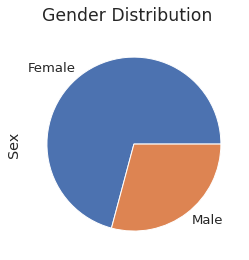

In [33]:
#pieplot
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution")


Insight

•	This graph shows that the ratio of male to female of the people who gave review about the drug.

•	Number of female is more than number of male. i.e., female has been given reviews more than male.

•	Here we understand the usage of drugs with respect to Sex. There were twice as number of female drugs users than the male drugs user.


# Usage of drugs with respect to age

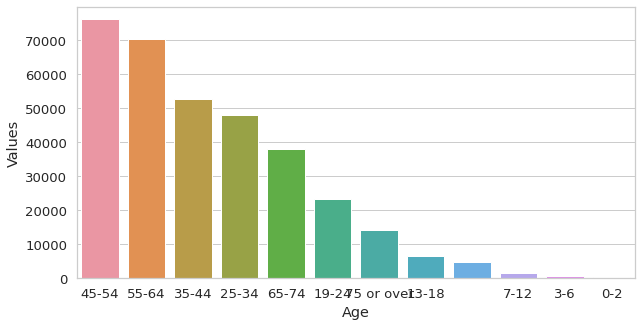

In [35]:
ageColourful = df['Age'].value_counts().reset_index()
ageColourful.columns = ["Age", "Values"]
ageColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Age',y ='Values', data = ageColourful);
plt.show();

# Insight

•	This graph shows how many reviewers from each Age category have given their reviews

•	Here we understand the usage of drugs with respect to Age. There were more than 50% of the drugs users are from Age Group 45 to 65.However, 45-54 is the mostly effected age group.

•	The age group of drug usage starts from teenagers, means, i.e., people starts using drugs from their teenage.



In [36]:
data=df.loc[(df['Age']=="45-54")]

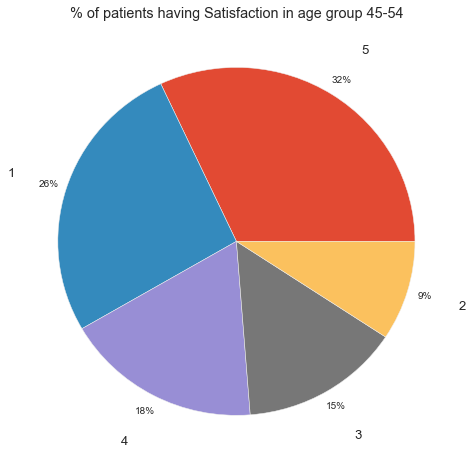

In [ ]:
#pie chart of mostly effected age group that is 45-54
tr = pd.DataFrame(data['Satisfaction'].value_counts())
tr_names = tr.index
count=tr['Satisfaction']
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.3)
plt.title('% of patients having Satisfaction in age group 45-54')
plt.show()

Insight

•	This Pie chart shows 32 percentage of patients having satisfaction rate 5 that means highest number of patients have high satisfaction.

•	Only 9 percentage of patients given satisfaction rate 2.

•	Around 26% of reviews given the satisfaction 1.


# Effectiveness Rating

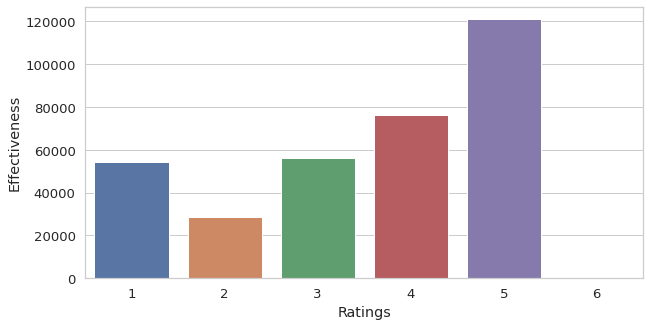

In [37]:
effectiveness = df['Effectiveness'].value_counts().reset_index()
effectiveness.columns = ["Ratings",'Effectiveness']
effectiveness

# set style
sns.set_style("whitegrid");

plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = 'Effectiveness', data = effectiveness);
plt.show();

# Insight

•	120000 of reviewers having the effectiveness rating five and this graph shows here five is the highest rate.

# Satisfaction level

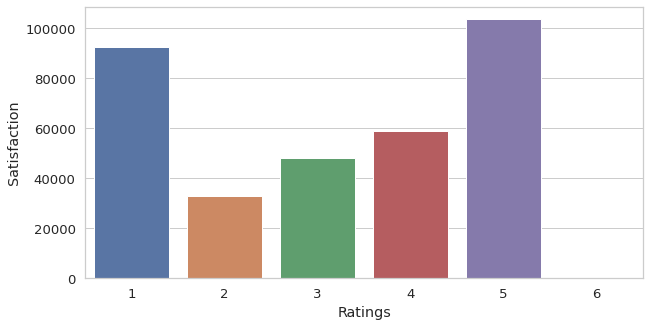

In [38]:
satisfactionLevel = df['Satisfaction'].value_counts().reset_index()
satisfactionLevel.columns = ["Ratings", "Satisfaction"]
satisfactionLevel

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y ='Satisfaction', data = satisfactionLevel);
plt.show();

# Insight

 •	Here we understand the usage of drugs with respect to their Satisfaction, Most of the drugs shows ease of using either scored very high or very low on their Satisfaction level.

•	Below 40000 of reviews had the lowest Satisfaction Ratings 2. That means some of the people are not completely satisfied by the drugs and they might found it has some kind of infective


# Ease of Use Rating

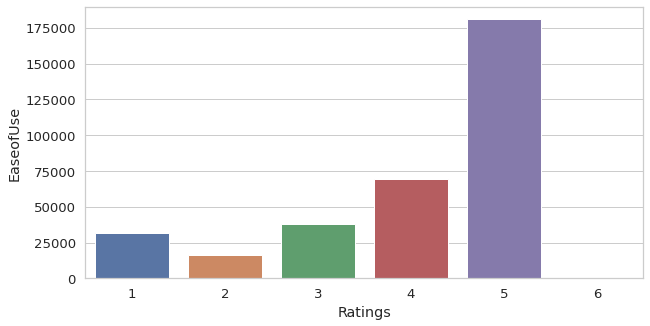

In [39]:
easeOfUseRating = df['EaseofUse'].value_counts().reset_index()
easeOfUseRating.columns = ["Ratings", "EaseofUse"]
easeOfUseRating

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = "EaseofUse", data = easeOfUseRating);
plt.show();

# Insight

•	Here we understand the usage of drugs with respect to their Ease of Usage, Most of the drugs shows scored high.

•	Highest rating of ease of use is five and lowest rating is two. That means most of the drugs are ease to use.


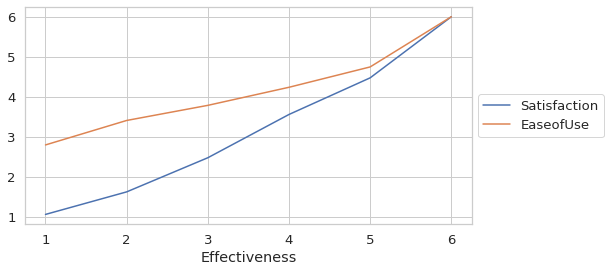

In [40]:
# line chart

df.groupby('Effectiveness')['Satisfaction','EaseofUse'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

Insight

•	Ease of using the drugs does not assure the satisfaction of the customer

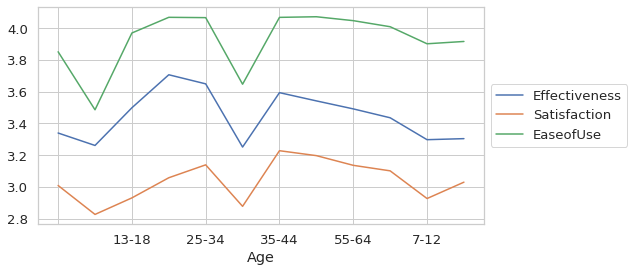

In [41]:
# line chart

df.groupby('Age')['Effectiveness','Satisfaction', 'EaseofUse'].mean().plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend

In [42]:
dfcorr = df.corr()
dfcorr

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.012843,-0.010473,-0.033542,0.013562
EaseofUse,-0.012843,1.000000,0.532291,0.553150,0.028139
Effectiveness,-0.010473,0.532291,1.000000,0.793238,0.048909
Satisfaction,-0.033542,0.553150,0.793238,1.000000,0.018570
UsefulCount,0.013562,0.028139,0.048909,0.018570,1.000000


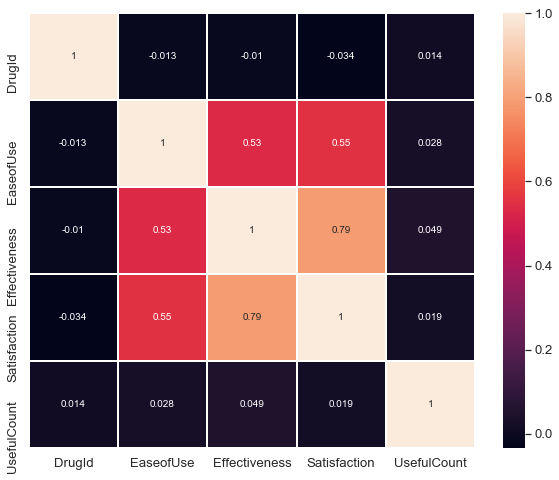

In [ ]:
#find correlation
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(dfcorr, xticklabels = dfcorr.columns, yticklabels = dfcorr.columns,annot=True,linewidths=1)


Insight

•	The above correlation matrix shows Effectiveness and Satisfaction are highly correlated.

In [ ]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

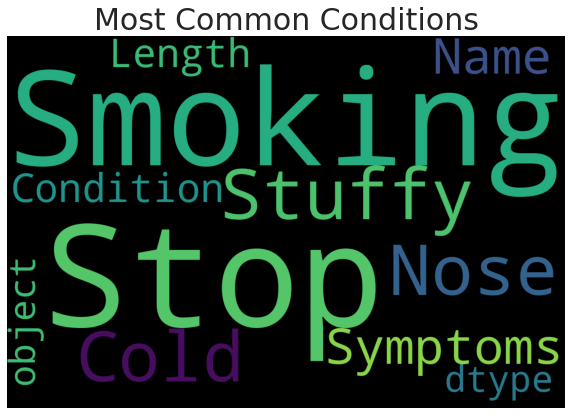

In [43]:
# most common conditions among the patients

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df['Condition']))

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Most Common Conditions', fontsize = 30)
print(wordcloud)
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

Insight

•	These are the most common conditions of the patients

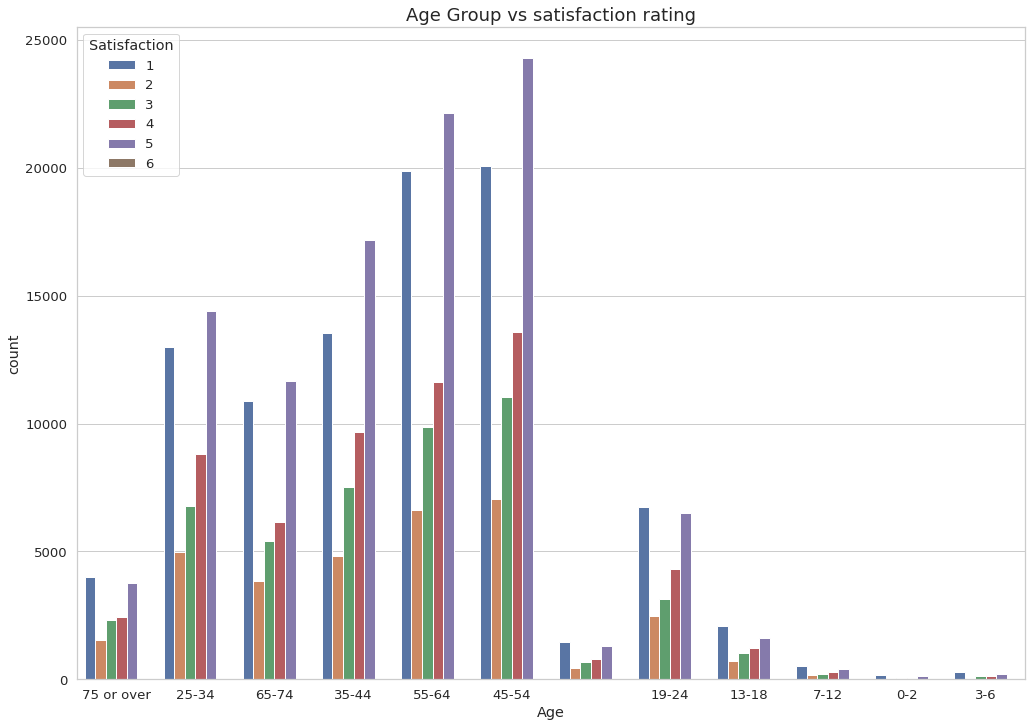

In [44]:
age_effect=df.groupby('Age')['Satisfaction'].sum()
plt.figure(figsize=(17,12))
plt.title('Age Group vs satisfaction rating',fontsize=18)

sns.countplot(data=df,x="Age",hue="Satisfaction")
plt.show()

Insight

•	Above graph shows, that age group 45-54 have thehighest satisfaction rate compared to other age group.

In [ ]:
#extract month,day and year from the dataset 
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')

In [ ]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment
0,75 or over,Stuffy Nose,09/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0
1,25-34,Cold Symptoms,01/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0
2,65-74,Other,07/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.0
3,75 or over,Other,09/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.0
4,35-44,Other,01/06/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.0
5,55-64,Other,07/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0,0.0
6,25-34,Birth Control,06/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,0.0
7,45-54,Disease of Ovaries with Cysts,01/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,1.0
8,25-34,Acne,04/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1,0.0
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,0.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['time'] = df['Date'].dt.time

In [ ]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment,Year,month,day,time
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,1.0,2014,9,21,00:00:00
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,1.0,2011,1,13,00:00:00
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,0.0,2012,7,16,00:00:00
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,0.0,2010,9,23,00:00:00
4,35-44,Other,2009-01-06,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,0.0,2009,1,6,00:00:00
5,55-64,Other,2008-07-19,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0,0.0,2008,7,19,00:00:00
6,25-34,Birth Control,2017-06-15,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0,0.0,2017,6,15,00:00:00
7,45-54,Disease of Ovaries with Cysts,2017-01-30,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0,1.0,2017,1,30,00:00:00
8,25-34,Acne,2016-04-27,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1,0.0,2016,4,27,00:00:00
9,55-64,Stuffy Nose,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0,0.0,2012,10,29,00:00:00


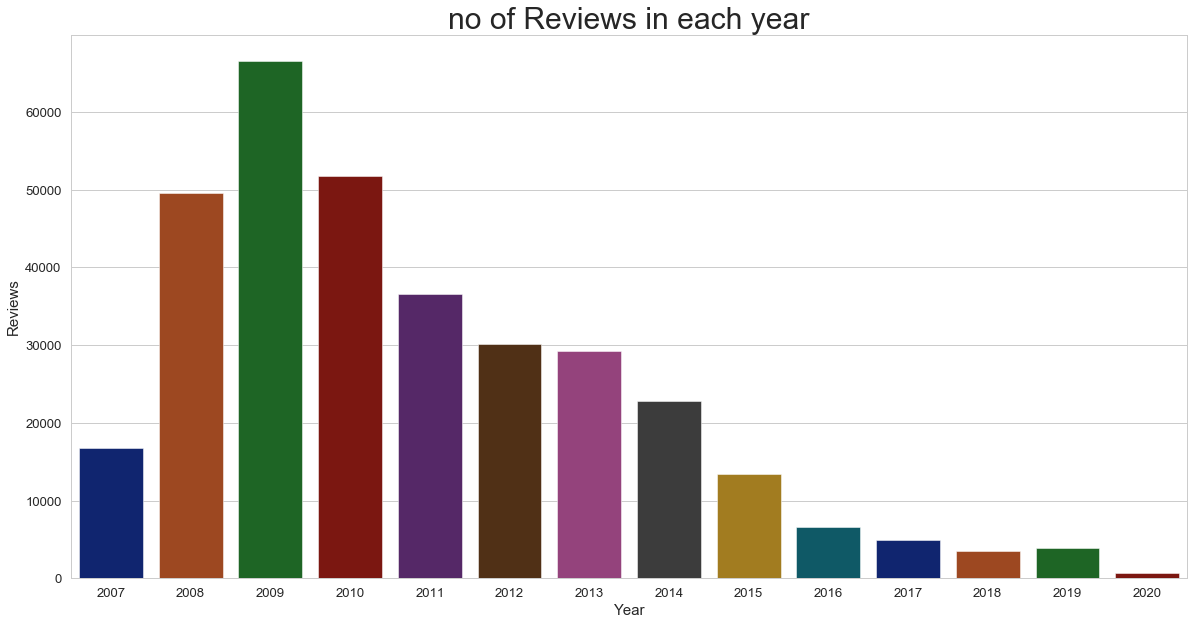

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['Year'], palette ='dark')
plt.title('no of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Reviews', fontsize = 15)
plt.show()

# pre processing

In [ ]:
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          33
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [ ]:
df["Reviews"].fillna( method ='ffill', inplace = True)

In [ ]:
df.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
df['Effectiveness'].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
6         2
Name: Effectiveness, dtype: int64

In [ ]:
#"Effectiveness" column contains rating value from 1 to 5,Therefore values that indicates rating of 6 will be removed in order to get a clean Data Set
index_names = df[ df['Effectiveness'] == 6 ].index
df.drop(index_names, inplace = True)

In [ ]:
df["Effectiveness"].value_counts()

5    120887
4     76460
3     56114
1     54330
2     28476
Name: Effectiveness, dtype: int64

# Selection of Drug
We are selecting the dataset extracted based on the drug named 'cymbalta' with DrugId =91491.Because it is having the most occurences.

In [ ]:
data=df.drop(df.loc[(df['Drug']!='cymbalta')].index)

In [ ]:
data.shape

(4451, 12)

In [ ]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314267,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5,4,I have only had one 30mg and so far i noticed ...,4,Female,"Nausea , dry mouth , constipation , loss of ...",0
314281,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2,1,,1,Male,"Nausea , dry mouth , constipation , loss of ...",2
314305,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5,4,The biggest problem was impotency from this pi...,4,Male,"Nausea , dry mouth , constipation , loss of ...",0


In [ ]:
data['Satisfaction'].value_counts()

1    1433
5    1210
4     819
3     619
2     370
Name: Satisfaction, dtype: int64

In [ ]:
data['UsefulCount'].unique()

array([ 0. ,  2. ,  1. , 19.5, 12. ,  3. , 15. ,  4. ,  5. ,  7. , 18. ,
        9. ,  8. ,  6. , 19. , 17. , 13. , 14. , 10. , 11. , 16. ])

In [ ]:
data['Condition'].value_counts()

Major Depressive Disorder                                    1855
Neuropathic Pain                                              670
Repeated Episodes of Anxiety                                  560
Other                                                         496
Disorder characterized by Stiff, Tender & Painful Muscles     398
Chronic Muscle or Bone Pain                                   387
Diabetic Complication causing Injury to some Body Nerves       49
Anxiousness associated with Depression                         36
Name: Condition, dtype: int64

In [ ]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4451
Name: Sides, dtype: int64

In [ ]:
df.Reviews.nunique()

232561

In [ ]:
#Since Reviews is having more than half of the values as unique we can neglect this column
data.drop("Reviews",axis=1,inplace=True)

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314267,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0
314281,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",2
314305,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0


In [ ]:
df.isnull().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
df_copy =data

# finding missing values

In [ ]:
data['Age'].value_counts()

45-54         1264
55-64          961
35-44          860
25-34          580
65-74          381
19-24          222
75 or over      98
                51
13-18           32
0-2              1
7-12             1
Name: Age, dtype: int64

there is a age group is missing(group 3-6) and shown a blank space.

In [ ]:
#filling the blank space with 3-6
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [ ]:
data['Age'].value_counts()

45-54         1264
55-64          961
35-44          860
25-34          580
65-74          381
19-24          222
75 or over      98
3-6             51
13-18           32
0-2              1
7-12             1
Name: Age, dtype: int64

# OUTLIERS DETECTION

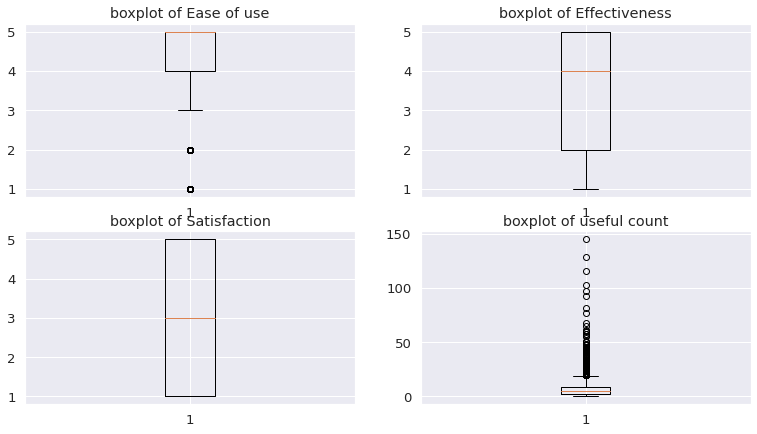

In [ ]:
plt.figure(figsize=(13,7))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()

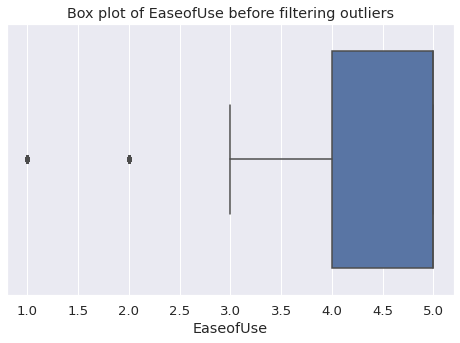

In [ ]:
#Removing the outliers in EaseofUse column
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(data['EaseofUse'],data=data)
plt.title('Box plot of EaseofUse before filtering outliers');

In [ ]:
Q1 = data['EaseofUse'].quantile(0.25)
Q3 = data['EaseofUse'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['EaseofUse']=np.where(data['EaseofUse']>upper_whisker,upper_whisker,np.where(data['EaseofUse']<lower_whisker,lower_whisker,data['EaseofUse']))

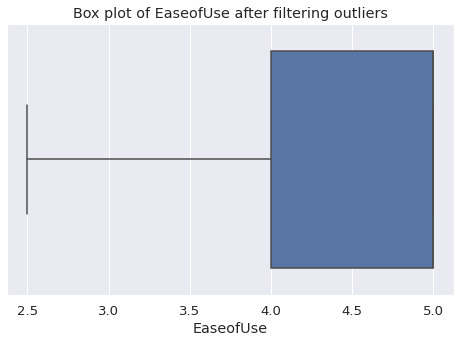

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data['EaseofUse'],data=data)
plt.title('Box plot of EaseofUse after filtering outliers');

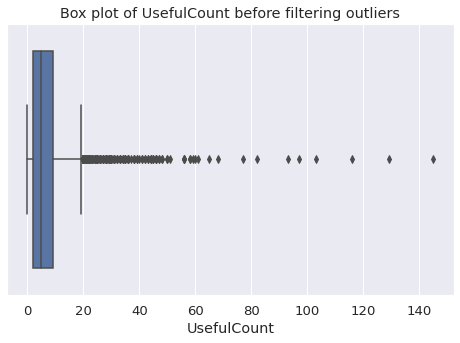

In [ ]:
#Removing the outliers in UsefulCount column
import seaborn as sns
plt.figure(figsize=(8,5))
sns.boxplot(data['UsefulCount'],data=data)
plt.title('Box plot of UsefulCount before filtering outliers');

In [ ]:
Q1 = data['UsefulCount'].quantile(0.25)
Q3 = data['UsefulCount'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['UsefulCount']=np.where(data['UsefulCount']>upper_whisker,upper_whisker,np.where(data['UsefulCount']<lower_whisker,lower_whisker,data['UsefulCount']))

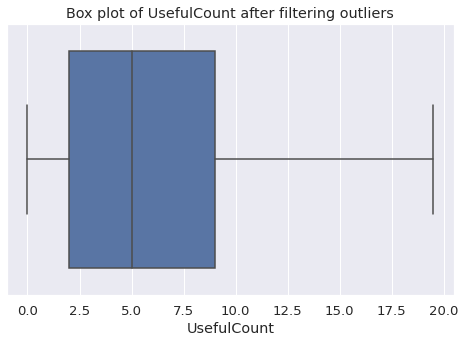

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data['UsefulCount'],data=data)
plt.title('Box plot of UsefulCount after filtering outliers');

In [ ]:
data.shape

(4451, 11)

In [ ]:
#adding index column
list2=list(range(4451))
data=data.set_index([list2])

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
1,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
2,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5.0,4,4,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
3,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2.5,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",2.0
4,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5.0,4,4,Male,"Nausea , dry mouth , constipation , loss of ...",0.0


# Encoding

In [ ]:
# On the basis of 'Satisfaction' let us recode the values of 'Effectiveness' to  categorical values rnging from 1 to 5.
data['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
data['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
1,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,moderate side effects,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
2,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5.0,mild side effects,4,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
3,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2.5,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",2.0
4,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5.0,mild side effects,4,Male,"Nausea , dry mouth , constipation , loss of ...",0.0


# Effect of drug on age group 45-54 (which is mostly affected among the age group)

# Feature engineering

In [ ]:
dt=data.loc[(data['Age']=="45-54")]

In [ ]:
# let's make a new column review sentiment 
data.loc[(data['Satisfaction'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['Satisfaction'] <5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

0.0    3241
1.0    1210
Name: Review_Sentiment, dtype: int64

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Review_Sentiment
0,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3.0,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0
1,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3.0,moderate side effects,2,Female,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0
2,45-54,Chronic Muscle or Bone Pain,11/9/2019,cymbalta,91491,5.0,mild side effects,4,Female,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0
3,19-24,Major Depressive Disorder,9/29/2019,cymbalta,91491,2.5,extreme severe side effects,1,Male,"Nausea , dry mouth , constipation , loss of ...",2.0,0.0
4,55-64,Chronic Muscle or Bone Pain,9/18/2019,cymbalta,91491,5.0,mild side effects,4,Male,"Nausea , dry mouth , constipation , loss of ...",0.0,0.0


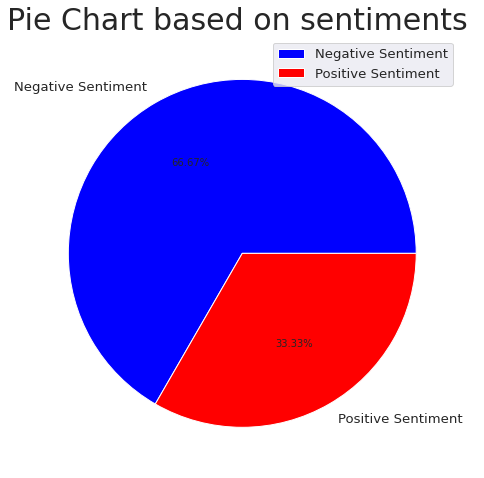

In [ ]:
# a pie chart to represent the sentiments of the patients

colors = ['blue', 'red']
labels = "Negative Sentiment","Positive Sentiment"
size=[3000,1500]
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size, colors = colors, labels = labels,autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart based on sentiments ', fontsize = 30)
plt.legend()
plt.show()

In [ ]:
data=data.drop(['Date','Drug','DrugId','Sides'],axis=1)

# Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    data[col]=label.fit_transform(data[col])
    
datastand=data

In [ ]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount,Review_Sentiment
0,6,7,3.0,extreme severe side effects,1,1,0.0,0.0
1,5,0,3.0,moderate side effects,2,0,0.0,0.0
2,6,1,5.0,mild side effects,4,0,0.0,0.0
3,2,4,2.5,extreme severe side effects,1,1,2.0,0.0
4,7,1,5.0,mild side effects,4,1,0.0,0.0


# Data splitting

In [ ]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
ycopy=df_copy['Effectiveness']
xcopy=df_copy.drop(['Effectiveness'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)
xcopy_train,xcopy_test,ycopy_train,ycopy_test=train_test_split(xcopy,ycopy,random_state=42,test_size=0.1)

# Model Selection

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.57      0.96      0.72        89
          mild side effects       0.63      0.70      0.67       105
      moderate side effects       0.50      0.45      0.47        65
            no side effects       0.85      0.76      0.80       137
        severe side effects       1.00      0.02      0.04        50

                   accuracy                           0.66       446
                  macro avg       0.71      0.58      0.54       446
               weighted avg       0.71      0.66      0.62       446

[[ 85   1   3   0   0]
 [  6  74   9  16   0]
 [ 15  19  29   2   0]
 [  8  21   4 104   0]
 [ 34   2  13   0   1]]
accuracy is 0.6569506726457399


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Finding best k value
acc_values=[]

neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [ ]:
acc_values

[0.594170403587444,
 0.5896860986547086,
 0.6165919282511211,
 0.6076233183856502,
 0.6165919282511211,
 0.6278026905829597,
 0.6188340807174888,
 0.6053811659192825,
 0.6121076233183856,
 0.6076233183856502,
 0.6031390134529148,
 0.6210762331838565]

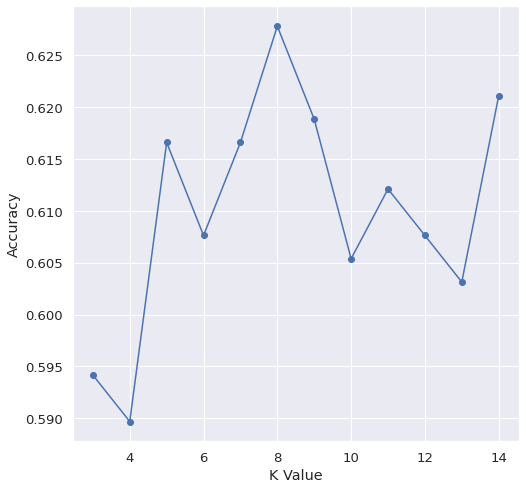

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.54      0.90      0.67        89
          mild side effects       0.61      0.66      0.63       105
      moderate side effects       0.53      0.40      0.46        65
            no side effects       0.81      0.74      0.78       137
        severe side effects       0.33      0.06      0.10        50

                   accuracy                           0.63       446
                  macro avg       0.56      0.55      0.53       446
               weighted avg       0.61      0.63      0.60       446

[[ 80   3   1   1   4]
 [  5  69  12  19   0]
 [ 19  15  26   3   2]
 [  8  22   5 102   0]
 [ 37   4   5   1   3]]
accuracy is 0.6278026905829597


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.57      0.94      0.71        89
          mild side effects       0.70      0.62      0.66       105
      moderate side effects       0.50      0.55      0.53        65
            no side effects       0.85      0.76      0.80       137
        severe side effects       0.45      0.10      0.16        50

                   accuracy                           0.66       446
                  macro avg       0.61      0.60      0.57       446
               weighted avg       0.66      0.66      0.64       446

[[ 84   1   2   0   2]
 [  6  65  17  17   0]
 [ 15   8  36   2   4]
 [  8  16   9 104   0]
 [ 34   3   8   0   5]]
accuracy is 0.6591928251121076


# Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                             precision    recall  f1-score   support

extreme severe side effects       0.57      0.96      0.72        89
          mild side effects       0.68      0.37      0.48       105
      moderate side effects       0.36      0.65      0.46        65
            no side effects       0.84      0.75      0.79       137
        severe side effects       0.00      0.00      0.00        50

                   accuracy                           0.60       446
                  macro avg       0.49      0.54      0.49       446
               weighted avg       0.59      0.60      0.57       446

[[ 85   0   4   0   0]
 [  6  39  42  18   0]
 [ 15   4  42   2   2]
 [  8  14  12 103   0]
 [ 34   0  16   0   0]]


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.57      0.75      0.65        89
          mild side effects       0.59      0.58      0.59       105
      moderate side effects       0.41      0.46      0.43        65
            no side effects       0.79      0.72      0.76       137
        severe side effects       0.32      0.18      0.23        50

                   accuracy                           0.60       446
                  macro avg       0.54      0.54      0.53       446
               weighted avg       0.59      0.60      0.59       446

[[67  2  5  2 13]
 [ 6 61 20 18  0]
 [13 13 30  5  4]
 [ 6 24  6 99  2]
 [25  3 12  1  9]]
accuracy is 0.5964125560538116


In [ ]:
# Fine tuning of parametres
rf_ft=RandomForestClassifier(max_depth=100,n_estimators=100)
rf_ft.fit(x_train,y_train)
y_rf_ft=rf_ft.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rf_ft))
print("confusion matrix is",confusion_matrix(y_test,y_rf_ft))

accuracy is 0.5964125560538116
confusion matrix is [[67  2  4  2 14]
 [ 6 61 21 17  0]
 [13 11 31  6  4]
 [ 7 24  7 98  1]
 [26  3 11  1  9]]


 There is a slight difference after fine tuning.

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is ',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.58      0.70      0.63        89
          mild side effects       0.57      0.66      0.61       105
      moderate side effects       0.42      0.48      0.45        65
            no side effects       0.80      0.66      0.72       137
        severe side effects       0.24      0.16      0.19        50

                   accuracy                           0.58       446
                  macro avg       0.52      0.53      0.52       446
               weighted avg       0.58      0.58      0.58       446

[[62  4  8  3 12]
 [ 6 69 15 15  0]
 [10 10 31  4 10]
 [ 6 31  7 90  3]
 [23  6 12  1  8]]
Accuracy is  0.5829596412556054


# SVC

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)

# Summary of the predictions made by the classifier

y_pred=svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                             precision    recall  f1-score   support

extreme severe side effects       0.57      0.96      0.71        89
          mild side effects       0.67      0.67      0.67       105
      moderate side effects       0.49      0.52      0.51        65
            no side effects       0.85      0.76      0.80       137
        severe side effects       0.00      0.00      0.00        50

                   accuracy                           0.66       446
                  macro avg       0.52      0.58      0.54       446
               weighted avg       0.60      0.66      0.62       446

[[ 85   1   3   0   0]
 [  6  70  13  16   0]
 [ 17  12  34   2   0]
 [  8  20   5 104   0]
 [ 34   2  14   0   0]]
accuracy is 0.6569506726457399


# Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()
gb_clf=GradientBoostingClassifier()
gnb_clf=GaussianNB()
dt_clf=DecisionTreeClassifier()
svc_clf=SVC()
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, gb_clf,gnb_clf,dt_clf,svc_clf,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6322869955156951
RandomForestClassifier 0.5739910313901345
KNeighborsClassifier 0.6165919282511211
GradientBoostingClassifier 0.6591928251121076
GaussianNB 0.6031390134529148
DecisionTreeClassifier 0.5874439461883408
SVC 0.6569506726457399
VotingClassifier 0.6614349775784754


In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf),('gb',gb_clf), ('gnb',gnb_clf),('dt',dt_clf),('svc',svc_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.616592
1   LR  0.656951
2   DT  0.589686
3   RF  0.603139
4   GB  0.659193
5  GNB  0.603139
6  SVC  0.656951
7   EL  0.663677


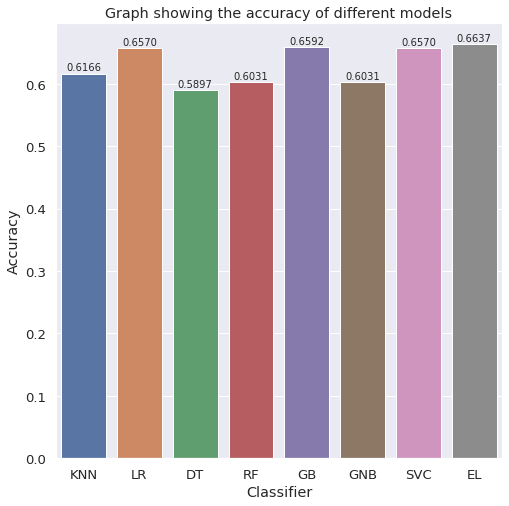

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.title('Graph showing the accuracy of different models')    
plt.show()

# Inference:
 
Comparing different models, GradientBoostingClassifier shows highest accuracy with 65.92 and seem to be the best of all models.
